## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import joblib

# About the Data

### Obtained from Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists. O'Reilly Media, Inc.

It is 22687 rows × 22 columns

The definition of the variables are:


DocumentDate: This is the date on which the property sale transaction was recorded.

SalePrice: This is the price at which the property was sold.

PropertyID: This is a unique identifier assigned to each property in the dataset.

PropertyType: This variable indicates the type of property being sold, such as a single-family home, townhouse, or condominium.

ym: This variable represents the year and month in which the property sale was recorded.

zhvi_px: This is the Zillow Home Value Index (ZHVI) for the property, measured in dollars.

zhvi_idx: This is the ZHVI index for the property, which compares its value to the overall housing market.

AdjSalePrice: This variable is the SalePrice adjusted for inflation.

NbrLivingUnits: This variable indicates the number of living units in the property, such as the number of apartments in a multi-family building.

SqFtLot: This variable represents the size of the property in square feet.

SqFtTotLiving: This variable represents the total living space in the property, measured in square feet.

SqFtFinBasement: This variable represents the finished basement area in the property, measured in square feet.

Bathrooms: This variable represents the number of bathrooms in the property.

Bedrooms: This variable represents the number of bedrooms in the property.

BldgGrade: This variable represents the overall grade of the building, which is determined by its construction quality, design, and condition.

YrBuilt: This variable represents the year the building was constructed.

YrRenovated: This variable represents the year the building was last renovated.

TrafficNoise: This variable represents the level of traffic noise around the property.

LandVal: This variable represents the assessed value of the land on which the property is built.

ImpsVal: This variable represents the assessed value of the improvements on the land, such as the building and any other structures.

ZipCode: This variable represents the zip code in which the property is located.
NewConstruction: This variable indicates whether the property is newly constructed or not.

# Data preprocessing

In [2]:
data = pd.read_csv("house_sales.csv", sep = '\t')
data

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False


Since the 'NewConstruction' feature is categorical, we need to transform it to a binary format

In [3]:
# create a LabelEncoder object
le = LabelEncoder()

# apply the LabelEncoder to the 'color' column
data['NewConstruction_encoded'] = le.fit_transform(data['NewConstruction'])

# drop the original 'color' column
data.drop('NewConstruction', axis = 1, inplace = True)

I selected these relevant columns as I believe they can explain the price of a house 

In [4]:
X = data[
    [
    'zhvi_px', 'zhvi_idx', 'NbrLivingUnits', 
    'NbrLivingUnits', 'SqFtLot', 'SqFtTotLiving', 
    'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
    'BldgGrade', 'YrBuilt', 'YrRenovated', 
    'TrafficNoise', 'LandVal', 'ImpsVal', 
    'NewConstruction_encoded'
    ]
]
y = data['AdjSalePrice']

Let's check out how much each feature has an influence on the overall variance.
We usally prefer features with VIF < 30, where VIF: Variance-inflating-Factor.

In [5]:
# calculate the VIF for each X variable

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

c:\Users\adana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,zhvi_px,inf
1,zhvi_idx,inf
2,NbrLivingUnits,inf
3,NbrLivingUnits,inf
4,SqFtLot,1.241349
5,SqFtTotLiving,34.717742
6,SqFtFinBasement,2.006095
7,Bathrooms,24.694736
8,Bedrooms,26.281756
9,BldgGrade,157.303135


As seen above, the variables 'zhvi_px', 'zhvi_idx', 'NbrLivingUnits', & 'NbrLivingUnits' have an infinite variance! 

This is troublesome for us when creating the prediction model later. Therefore, we drop these variables and redo the VIF tests.

In [6]:
X = X.drop(['zhvi_px', 'zhvi_idx', 'NbrLivingUnits', 'NbrLivingUnits'], axis = 1)

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Feature,VIF
0,SqFtLot,1.241181
1,SqFtTotLiving,34.712519
2,SqFtFinBasement,2.004472
3,Bathrooms,24.388421
4,Bedrooms,25.813655
5,BldgGrade,154.274566
6,YrBuilt,106.011038
7,YrRenovated,1.091999
8,TrafficNoise,1.153609
9,LandVal,3.925212


After doing so, we also see that 'BldgGrade' & 'YrBuilt' are highly variant. So we drop them too.

In [7]:
X = X.drop(['BldgGrade', 'YrBuilt'], axis = 1)

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Feature,VIF
0,SqFtLot,1.238547
1,SqFtTotLiving,28.998179
2,SqFtFinBasement,1.823951
3,Bathrooms,21.528518
4,Bedrooms,15.453433
5,YrRenovated,1.090265
6,TrafficNoise,1.131878
7,LandVal,3.738511
8,ImpsVal,8.162535
9,NewConstruction_encoded,1.253322


Ok, now our variables are not so variant and are suitable to use for prediction

Split the data into 70% training and 30% testing, randomly.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True, test_size = 0.3)

# Model Development

Defining the pipeline with a StandardScaler (to standardize the variables right before they're used to build the mode) and LinearRegression

In [9]:
pipeline = make_pipeline(
    StandardScaler(with_mean = True), 
    LinearRegression(n_jobs = -1)
)

hyperparameters to tune (By nature, a simple linear regression like this one does not have that many hyperparameters to tune)

In [10]:
params = {
    'linearregression__fit_intercept': [True]
}

Using grid search to find the best hyperparameters.

We specified 5 cross-validations to avoid overfitting the model; that is, the data is split into 5 parts, using 4 to train and 1 to test, and repeating the process a total of 5 times 

In [11]:
grid = GridSearchCV(pipeline, param_grid = params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression(n_jobs=-1))]),
             param_grid={'linearregression__fit_intercept': [True]})

Analyzing the coefficients

In [12]:
# Get the names of the variables in the pipeline
var_names = X.columns.values

# Get the coefficients of the variables in the pipeline
coefficients = grid.best_estimator_.named_steps['linearregression'].coef_

# Combine the variable names and coefficients into a dataframe
coefs_df = pd.DataFrame(
    {
    'Variable': var_names, 
    'Coefficient': coefficients
     }
)
coefs_df

,Variable,Coefficient
0,SqFtLot,12405.842631
1,SqFtTotLiving,43903.783435
2,SqFtFinBasement,-5509.565385
3,Bathrooms,223.575541
4,Bedrooms,-7875.603225
5,YrRenovated,-5748.297577
6,TrafficNoise,-938.201401
7,LandVal,188396.528430
8,ImpsVal,179216.564025
9,NewConstruction_encoded,7488.573354


From here, we see that 'SqFtFinBasement', 'Bedrooms', 'YrRenovated', & 'TrafficNoise' negatively impact the price level of a house. i.e., if a house has 10 rooms it is likely to be more expensive than a 2-room one.

# Moded Diagnosis

Using the best estimator to make predictions on the test set

In [13]:
y_pred_test = grid.predict(X_test)

the R-squared (explained variance) of the model on the test set

In [14]:
print('R-squared:', r2_score(y_test, y_pred_test))

R-squared: 0.8797958311580365


And the mean squared error of the model on the test set

In [15]:
print('MSE:', mean_squared_error(y_test, y_pred_test))

MSE: 18715972399.975502


Plotting the residuals of the model on the test set

[]

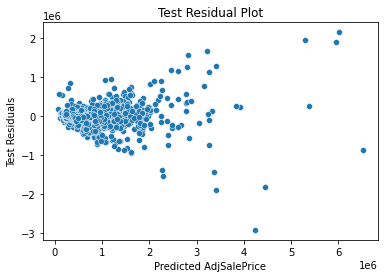

In [16]:
residuals_test = y_test - y_pred_test
sns.scatterplot(x = y_pred_test, y = residuals_test)
plt.xlabel('Predicted AdjSalePrice')
plt.ylabel('Test Residuals')
plt.title('Test Residual Plot')
plt.plot()

An R$^2$ of 88% is quite good and indicates that the model can explain the majority of the variance in the data

Let's look at the overall performance of the model

In [17]:
y_pred_all = grid.predict(X)

the R-squared (explained variance) of the model on the entire dataset

In [18]:
print('R-squared:', r2_score(y, y_pred_all))

R-squared: 0.8708521289726638


And the mean squared error of the model on the entire dataset

In [19]:
print('MSE:', mean_squared_error(y, y_pred_all))

MSE: 19182180550.235657


Plotting the residuals of the model on the entire dataset

[]

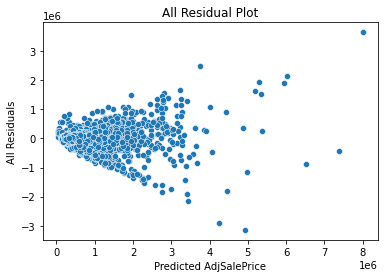

In [20]:
residuals_all = y - y_pred_all
sns.scatterplot(x = y_pred_all, y = residuals_all)
plt.xlabel('Predicted AdjSalePrice')
plt.ylabel('All Residuals')
plt.title('All Residual Plot')
plt.plot()

Testing for AutoCorrelation on the Residuals of the model

In [21]:
# calculate the Durbin-Watson test statistic
dw = sm.stats.stattools.durbin_watson(residuals_all)

# print the test statistic and interpret the results
print("Durbin-Watson test statistic:", dw)

if dw < 1.5:
    print("Positive autocorrelation detected.")

elif dw > 2.5:
    print("Negative autocorrelation detected.")
    
else:
    print("No significant autocorrelation detected.")

Durbin-Watson test statistic: 1.8900467880609755
No significant autocorrelation detected.


Sound like good news!

Now, let's test for Heteroscedasticity in the model

In [22]:
# calculate the Breusch-Pagan test statistic
bp = sm.stats.diagnostic.het_breuschpagan(residuals_all, X)

# print the test statistic and interpret the results
print("Breusch-Pagan test statistic:", bp[0])
print("p-value:", bp[1])

if bp[1] < 0.05:
    print("Signs of heteroscedasticity detected.")

else:
    print("No significant heteroscedasticity detected.")

Breusch-Pagan test statistic: 6025.384550066089
p-value: 0.0
Signs of heteroscedasticity detected.


According to the Breusch-Pagan test result, we do see a changing variance among the data, which makes since we have houses of different prices, sizes, and values

# Results

Now let's report the predictions in a DataFrame

First, we'll have to have to inverse-transform the predicted prices back to USD.
Since we implemented StandardSacaler() within a PipeLine, we must do this manually.

In [23]:
# Compute the mean and standard deviation of the target variable in the original data
adj_saleprice_mean = np.mean(y)
adj_saleprice_std = np.std(y)

# Reverse the scaling of the predicted values
y_pred_all_original_scale = y_pred_all * adj_saleprice_std + adj_saleprice_mean

# Round the predicted values to the nearest integer
y_pred_all_original_scale = np.round(y_pred_all_original_scale)

Creating the results DataFrame

In [24]:
results = pd.DataFrame(
    {
    'Property': data['PropertyID'],
    'Property Type': data['PropertyType'],
    'Predicted AdjSalePrice': y_pred_all_original_scale
    }
)

results

,Property,Property Type,Predicted AdjSalePrice
1,1000102,Multiplex,1.327267e+11
2,1200013,Single Family,3.328137e+11
3,1200019,Single Family,1.915295e+11
4,2800016,Single Family,1.568090e+11
5,2800024,Single Family,1.332079e+11
...,...,...,...
27057,9842300710,Single Family,1.585306e+11
27058,9845500010,Single Family,6.584465e+11
27061,9899200010,Single Family,9.382841e+10
27062,9900000355,Single Family,1.309542e+11


Writting to a CSV file

In [25]:
results.to_csv('results.csv', index = False)

And finally, let's save the model for future use:

In [26]:
joblib.dump(grid, 'Hosuing_prices_predictor.pkl')

['Hosuing_prices_predictor.pkl']

### Additionally, I made a Flask app where you can run it, enter your variables manually and obtain a prediction of the house you want!

### Check 'Flask_app.py'

# Thanks for reading!